# Importar modulos necesarios

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
from datetime import datetime, timedelta

# Generar datos aleatorios

In [136]:
teams = ['Real Madrid', 'Barcelona', 'Bayern de Munich', 'Atletico de Madrid', 'Juventus', 'Arsenal', 'Manchester United', 'Liverpool', 'AC Milan', 'Chelsea']

tournements = ['Champions League', 'Amistoso', 'Mundial de Clubes']

randomIds = [i for i in range(1, 3001)]

localTeams = random.choices(teams, k=3000)

visitorTeams = [random.choice([visitors for visitors in localTeams if visitors != local]) for local in localTeams]

randomTournements = random.choices(tournements, k=3000)

# Goles equipo local
GL = [random.randint(0, 11) for _ in range(3000)]

# Goles equipo visitante
GV = [random.randint(0, 11) for _ in range(3000)]

startDate = datetime(2024, 1, 1)
matchDates = [startDate + timedelta(days = random.randint(0, 365)) for _ in range(3000)]

# Dataframe

In [137]:
dfMatches = pd.DataFrame({
    'id': randomIds,
    'Local': localTeams,
    'Visitante': visitorTeams,
    'Goles Local': GL,
    'Goles Visitante': GV,
    'Torneo': randomTournements,
    'Fecha': matchDates
})

# Resultados

In [138]:
dfMatches.head(3000)

,id,Local,Visitante,Goles Local,Goles Visitante,Torneo,Fecha
0,1,Juventus,Liverpool,2,9,Mundial de Clubes,2024-08-27
1,2,Liverpool,AC Milan,4,10,Amistoso,2024-12-18
2,3,Liverpool,Chelsea,4,1,Mundial de Clubes,2024-11-25
3,4,Real Madrid,Barcelona,6,2,Mundial de Clubes,2024-07-26
4,5,AC Milan,Bayern de Munich,7,4,Champions League,2024-04-10
...,...,...,...,...,...,...,...
2995,2996,Real Madrid,Chelsea,5,5,Champions League,2024-07-25
2996,2997,Barcelona,Bayern de Munich,6,2,Mundial de Clubes,2024-07-25
2997,2998,Arsenal,Barcelona,5,3,Mundial de Clubes,2024-08-18
2998,2999,Liverpool,Barcelona,3,7,Mundial de Clubes,2024-03-05


# Resumen estadistico para variables numericas

In [139]:
dfMatches.describe()

,id,Goles Local,Goles Visitante,Fecha
count,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,5.475333,5.542000,2024-07-01 07:10:33.599999744
min,1.000000,0.000000,0.000000,2024-01-01 00:00:00
25%,750.750000,2.000000,3.000000,2024-04-04 00:00:00
50%,1500.500000,5.000000,6.000000,2024-07-02 00:00:00
75%,2250.250000,9.000000,8.000000,2024-09-30 00:00:00
max,3000.000000,11.000000,11.000000,2024-12-31 00:00:00
std,866.169729,3.493631,3.394713,NaN


# Resumen estadistico para variables categoricas

In [140]:
# Conteo de veces que aparece cada equipo por categoria de equipo local
dfMatches['Local'].value_counts()

Local
Liverpool             317
Real Madrid           316
Atletico de Madrid    306
Chelsea               305
Bayern de Munich      305
Manchester United     303
Juventus              292
Barcelona             291
AC Milan              284
Arsenal               281
Name: count, dtype: int64

In [141]:
# Frecuencia con la que aparece cada equipo de local
dfMatches['Local'].value_counts(normalize = True)

Local
Liverpool             0.105667
Real Madrid           0.105333
Atletico de Madrid    0.102000
Chelsea               0.101667
Bayern de Munich      0.101667
Manchester United     0.101000
Juventus              0.097333
Barcelona             0.097000
AC Milan              0.094667
Arsenal               0.093667
Name: proportion, dtype: float64

In [142]:
# Conteo de veces que aparece cada equipo por categoria de equipo visitante
dfMatches['Visitante'].value_counts()

Visitante
Real Madrid           322
Liverpool             316
Chelsea               315
Manchester United     305
Barcelona             296
Juventus              296
Bayern de Munich      291
Arsenal               291
Atletico de Madrid    286
AC Milan              282
Name: count, dtype: int64

In [143]:
# Frecuencia con la que aparece cada equipo de visitante
dfMatches['Visitante'].value_counts(normalize = True)

Visitante
Real Madrid           0.107333
Liverpool             0.105333
Chelsea               0.105000
Manchester United     0.101667
Barcelona             0.098667
Juventus              0.098667
Bayern de Munich      0.097000
Arsenal               0.097000
Atletico de Madrid    0.095333
AC Milan              0.094000
Name: proportion, dtype: float64

In [144]:
# Conteo de veces que aparece cada torneo
dfMatches['Torneo'].value_counts()

Torneo
Amistoso             1024
Mundial de Clubes    1006
Champions League      970
Name: count, dtype: int64

In [145]:
# Frecuencia con la que aparece cada torneo
dfMatches['Torneo'].value_counts(normalize = True)

Torneo
Amistoso             0.341333
Mundial de Clubes    0.335333
Champions League     0.323333
Name: proportion, dtype: float64

In [146]:
# Resumen general de todo el dataframe
dfMatches.describe(include = ['O'])

,Local,Visitante,Torneo
count,3000,3000,3000
unique,10,10,3
top,Liverpool,Real Madrid,Amistoso
freq,317,322,1024


# Visualizacion de datos

## Graficos de pastel

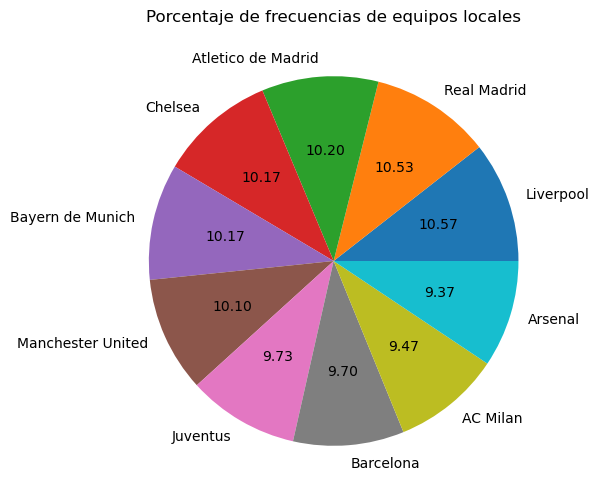

In [157]:
localPlot = dfMatches['Local'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='Porcentaje de frecuencias de equipos locales', ylabel='')

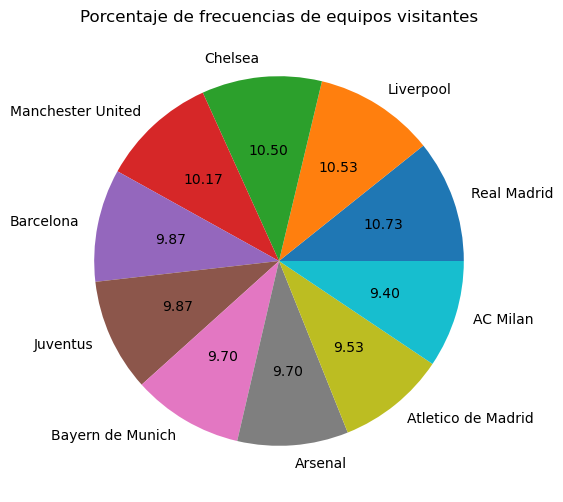

In [156]:
visitorsPlot = dfMatches['Visitante'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='Porcentaje de frecuencias de equipos visitantes', ylabel='')

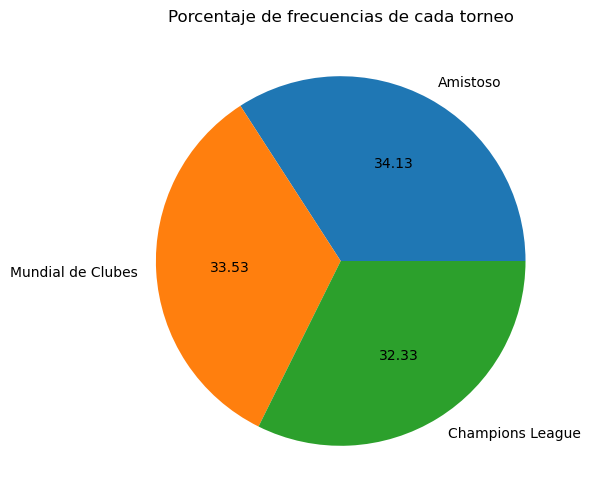

In [155]:
tournementsPlot = dfMatches['Torneo'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='Porcentaje de frecuencias de cada torneo', ylabel='')

## Histogramas

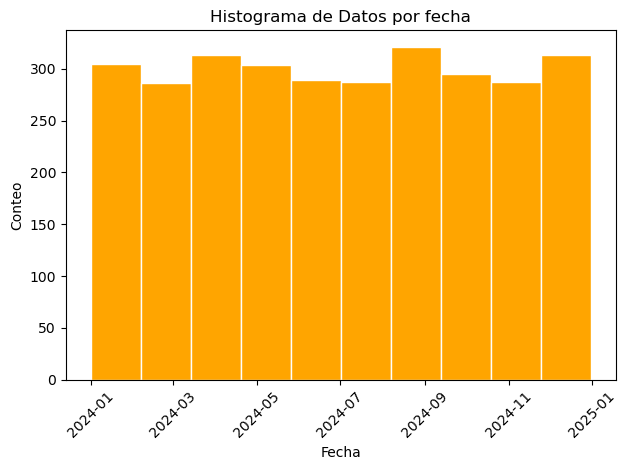

In [153]:
plt.hist(dfMatches['Fecha'], edgecolor = 'white', color = 'orange')
plt.title('Histograma de Datos por fecha')
plt.xticks(rotation = 45)
plt.xlabel('Fecha')
plt.ylabel('Conteo')
plt.tight_layout() 
plt.show()